# Generate LINCS Figgures for Cell Health Paper

**Gregory Way, 2020**

The figures generated in this notebook represent figure 4 and a supplementary figures

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

source(file.path("scripts", "visualize_utils.R"))
source(file.path("repurposing_cellhealth_shiny", "util.R"))
source(file.path("repurposing_cellhealth_shiny", "dose_utils.R"))

In [2]:
consensus = "modz"

In [3]:
# Load data
data <- load_data(path="repurposing_cellhealth_shiny/")
cp_embedding_df <- data[["moa"]]

cp_embedding_df <- cp_embedding_df %>%
    dplyr::mutate(Metadata_Treatment = "Compound")

cp_embedding_df$Metadata_Treatment[cp_embedding_df$Metadata_broad_core_id == "DMSO"] = "DMSO"

print(dim(cp_embedding_df))
head(cp_embedding_df, 3)

[1] 10368    88


Metadata_Plate_Map_Name,Metadata_broad_core_id,Metadata_broad_sample,Metadata_dose_recode,Metadata_mmoles_per_liter,Metadata_pert_well,umap_x,umap_y,broad_id,pert_iname,⋯,cc_g2_high_h2ax,cc_late_mitosis_n_spots_h2ax_mean,cc_cc_high_h2ax,vb_percent_dead_only,cc_s_high_h2ax,cc_cc_n_spots_h2ax_per_nucleus_area_mean,cc_s_n_spots_h2ax_per_nucleus_area_mean,cc_g1_plus_g2_count,vb_live_cell_width_length,Metadata_Treatment
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C-7161-01-LM6-001,BRD-A25234499,BRD-A25234499-001-18-3,6,10.0000,B13,-1.580029,-0.9219316,BRD-A25234499,aminoglutethimide,⋯,0.2751957,0.2319843,0.03473731,0.2267767,0.237375,0.10548474,0.1536775,-0.5309856,0.14445485,Compound
C-7161-01-LM6-001,BRD-A25234499,BRD-A25234499-001-18-3,5,3.3333,B14,-1.904766,-2.4360995,BRD-A25234499,aminoglutethimide,⋯,0.5169502,0.2421589,0.01257728,0.6328903,0.399858,0.02291539,0.2027969,-0.1597692,-0.29454513,Compound
C-7161-01-LM6-001,BRD-A25234499,BRD-A25234499-001-18-3,4,1.1111,B15,-1.899164,-2.5914881,BRD-A25234499,aminoglutethimide,⋯,0.4012496,0.2682545,0.08088620,0.2074322,0.337209,0.18061697,0.2859738,-0.2541855,-0.04831094,Compound


In [4]:
# Load Dose and Rank information
dose_df <- data[["dose"]]
rank_df <- data[["rank"]]

model_dict_df <- rank_df %>%
    dplyr::select(target, readable_name)
model_dict_df$target <- paste(model_dict_df$target)
model_dict_df$readable_name <- paste(model_dict_df$readable_name)

# Reshape the moa dataframe for different variable plotting
melt_id_vars <- c(
  "Metadata_Plate_Map_Name",
  "Metadata_pert_well",
  "Metadata_broad_core_id",
  "Metadata_broad_sample",
  "Metadata_dose_recode",
  "Metadata_mmoles_per_liter",
  "umap_x",
  "umap_y",
  "broad_id",
  "pert_iname",
  "InChIKey14",
  "moa",
  "target",
  "clinical_phase",
  "alternative_moa",
  "alternative_target",
  "broad_date"
)

moa_long_df <- reshape2::melt(
  cp_embedding_df,
  id.vars = melt_id_vars,
  value.name = "model_score",
  variable.name = "model"
)

moa_long_df$model <- paste(moa_long_df$model)
moa_long_df <- moa_long_df %>%
  dplyr::left_join(model_dict_df, by = c("model" = "target"))

moa_long_df$model_score <- as.numeric(paste(moa_long_df$model_score))

head(moa_long_df)

,Metadata_Plate_Map_Name,Metadata_pert_well,Metadata_broad_core_id,Metadata_broad_sample,Metadata_dose_recode,Metadata_mmoles_per_liter,umap_x,umap_y,broad_id,pert_iname,InChIKey14,moa,target,clinical_phase,alternative_moa,alternative_target,broad_date,model,model_score,readable_name
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,C-7161-01-LM6-001,B13,BRD-A25234499,BRD-A25234499-001-18-3,6,10.000000,-1.580029,-0.9219316,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1218401,Late M - # of gH2AX Spots per Area of Nucleus
2,C-7161-01-LM6-001,B14,BRD-A25234499,BRD-A25234499-001-18-3,5,3.333300,-1.904766,-2.4360995,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1355173,Late M - # of gH2AX Spots per Area of Nucleus
3,C-7161-01-LM6-001,B15,BRD-A25234499,BRD-A25234499-001-18-3,4,1.111100,-1.899164,-2.5914881,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1814137,Late M - # of gH2AX Spots per Area of Nucleus
4,C-7161-01-LM6-001,B16,BRD-A25234499,BRD-A25234499-001-18-3,3,0.370370,-1.708769,-0.8860601,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1684181,Late M - # of gH2AX Spots per Area of Nucleus
5,C-7161-01-LM6-001,B17,BRD-A25234499,BRD-A25234499-001-18-3,2,0.123460,-1.857128,-2.7086122,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1958430,Late M - # of gH2AX Spots per Area of Nucleus
6,C-7161-01-LM6-001,B18,BRD-A25234499,BRD-A25234499-001-18-3,1,0.041152,-1.860059,-2.6781860,BRD-A25234499,aminoglutethimide,ROBVIMPUHSLWNV,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,Launched,NA,NA,broad_id_20170327,cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.2555105,Late M - # of gH2AX Spots per Area of Nucleus


## Figure 4

In [5]:
# Panel A
legend_title <- "Predicted\nG1 Cell\nCount"
panel_a_gg <- visualize_umap(
    df = cp_embedding_df,
    target_variable = "cc_g1_n_objects",
    legend_title = legend_title,
    print_figure = FALSE
)

# Tweak the color scale to emphasize gradient
panel_a_gg <- panel_a_gg +
    scale_color_viridis_c(name = legend_title,
        values = scales::rescale(c(1, 0.8, 0.2)))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [6]:
# Panel B
legend_title <- "Predicted\nROS"
panel_b_gg <- visualize_umap(
    df = cp_embedding_df,
    target_variable = "vb_ros_mean",
    legend_title = legend_title,
    print_figure = FALSE
)

# Tweak the color scale to emphasize gradient
panel_b_gg <- panel_b_gg +
    scale_color_viridis_c(name = legend_title,
        values = scales::rescale(c(1, 0.96, 0.95)))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [7]:
cp_embedding_df$Metadata_Controls <- "Compounds"
cp_embedding_df$Metadata_Controls[cp_embedding_df$Metadata_broad_sample == "DMSO"] <- "DMSO"
cp_embedding_df$Metadata_Controls[cp_embedding_df$pert_iname == "bortezomib"] <- "bortezomib"
cp_embedding_df$Metadata_Controls[cp_embedding_df$pert_iname == "MG-132"] <- "MG-132"

table(cp_embedding_df$Metadata_Controls)


bortezomib  Compounds       DMSO     MG-132 
       330       9066        648        324 

In [8]:
focus_moa <- "PLK inhibitor"

control_df <- cp_embedding_df %>% dplyr::filter(Metadata_Controls != "Compounds")
compound_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Controls == "Compounds")

moa_df <- compound_df %>% dplyr::filter(moa == !!focus_moa)

print(dim(moa_df))

[1] 30 89


In [9]:
# What are the existing PLK inhibitors
table(moa_df$pert_iname)


    BI-2536   GSK461364     HMN-214 NMS-1286937  volasertib 
          6           6           6           6           6 

In [10]:
# Panel C
panel_c_gg <- ggplot(compound_df,
       aes(
           x = cc_g1_n_objects,
           y = vb_ros_mean,
           color = Metadata_dose_recode
       )) +
    geom_point(
        aes(shape = Metadata_Controls),
        data = compound_df,
        size = 0.5,
        alpha = 0.6
    ) +
    geom_point(
        data = control_df,
        aes(shape = Metadata_Controls),
        fill = "grey",
        color = "black",
        size = 1,
        alpha = 0.4,
    ) +
    geom_point(
        data = moa_df,
        aes(fill = Metadata_dose_recode,
            shape = moa),
        color = "black",
        size = 2,
        alpha = 0.7
    ) +
    theme_bw() +
    ylab("Predicted ROS") +
    xlab("Predicted G1 Cell Count") +
    scale_shape_manual(
        name = "Point Labels",
        values = c("DMSO" = 21,
                   "bortezomib" = 23,
                   "MG-132" = 25,
                   "PLK inhibitor" = 24,
                   "Compounds" = 16),
        labels = c("DMSO" = "DMSO",
                   "bortezomib" = "Bortezomib",
                   "MG-132" = "MG-132",
                   "PLK inhibitor" = "PLK inhibitor",
                   "Compounds" = "Other")
      ) +
    scale_color_continuous(name = "Dose Rank") +
    scale_fill_continuous(name = "Dose Rank") +
    guides(shape = guide_legend(order = 1,
                                override.aes = list(size = c(2, 1, 2, 2, 3.5))))

In [11]:
# Panel D - Dose Response
panel_d_gg <- suppressWarnings(
    get_dose_curve(
        moa_long_df,
        dose_df,
        model = "cc_g1_n_objects",
        pert_name = "HMN-214",
        cell_health_model = "G1 Cell Count"
    )
) + ylab("Predicted\nG1 Cell Count")

In [12]:
figure_theme = theme(
    axis.text = element_text(size = 7),
    axis.title = element_text(size = 9),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 7)
)

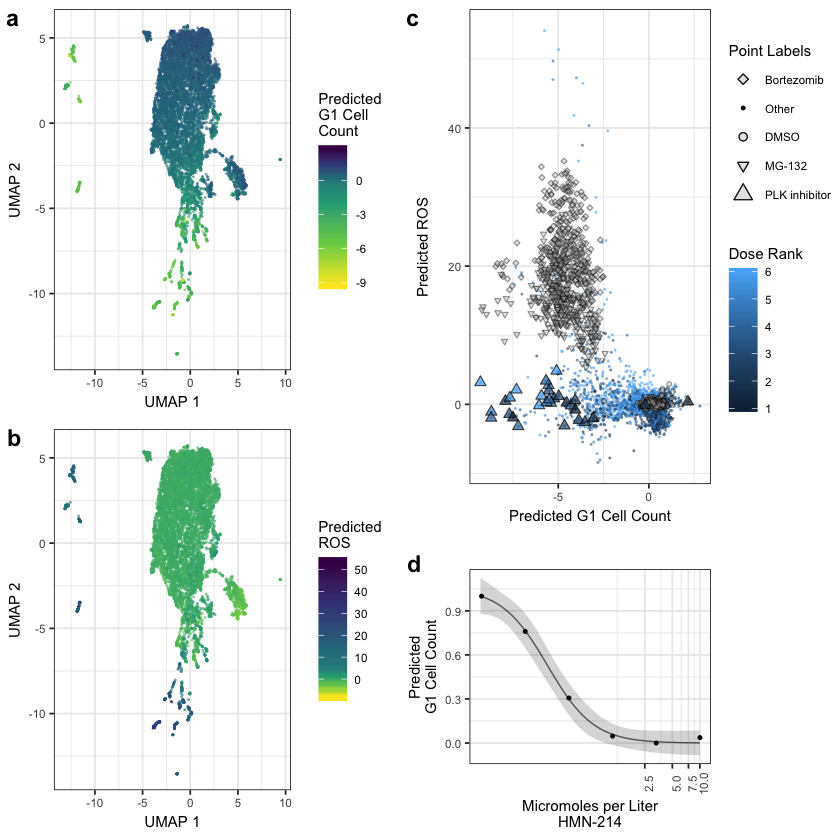

In [13]:
# Create multiplot
panel_a_b <- cowplot::plot_grid(
    panel_a_gg + figure_theme,
    panel_b_gg + figure_theme,
    labels = c("a", "b"),
    align = "hv",
    nrow = 2
)

panel_c_d <- cowplot::plot_grid(
    panel_c_gg + figure_theme +
        theme(legend.position = "none", axis.title.x = element_text(vjust = 5)),
    panel_d_gg + figure_theme + theme(axis.text.x = element_text(angle = 90)),
    labels = c("c", "d"),
    vjust = c(1.5, 0.7),
    align = "hv",
    nrow = 2,
    rel_heights = c(1, 0.5)
)

panel_c_d_legend <- cowplot::plot_grid(
    cowplot::get_legend(panel_c_gg + figure_theme),
    cowplot::ggdraw(),
    labels = c("", ""),
    align = "hv",
    nrow = 2,
    rel_heights = c(1, 0.85)
)

figure_4_gg <- cowplot::plot_grid(
    panel_a_b,
    panel_c_d,
    panel_c_d_legend,
    labels = c("", "", ""),
    align = "v",
    ncol = 3,
    rel_widths = c(1, 0.8, 0.3)
)

figure_file <- file.path("figures", "lincs_main_figure_4.png")

cowplot::save_plot(
    filename = figure_file,
    plot = figure_4_gg,
    dpi = 500,
    base_width = 8,
    base_height = 6
)

figure_4_gg

## Generate Supplementary Figure

In [14]:
# Load Viability Validation
validation_file = file.path(
    "..", "5.validate-repurposing", "results", "depmap_viability_validation.tsv.gz"
)

validation_df <- readr::read_tsv(validation_file, col_types = readr::cols())

print(dim(validation_df))
head(validation_df, 3)

[1] 5977   89


Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,cell_health_modz_target_cc_all_nucleus_roundness_mean,cell_health_modz_target_cc_polyploid_n_objects,cell_health_modz_target_cc_g1_n_objects,cell_health_modz_target_cc_mitosis_n_objects,⋯,disease.area,dose,indication,moa,name,phase,screen_id,smiles,target,dose_recode
<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
C-7161-01-LM6-001,BRD-A25234499-001-18-3,B13,10.0000,6,0.1218401,0.28787578,0.3321284,0.03166791,0.2935131,⋯,"endocrinology, oncology",10.0,"Cushing's syndrome, breast cancer",glucocorticoid receptor antagonist,aminoglutethimide,Launched,HTS002,"CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1","CYP11A1, CYP19A1",6
C-7161-01-LM6-001,BRD-A25234499-001-18-3,B14,3.3333,5,0.1355173,-0.01698349,0.1758055,0.04546745,0.2712013,⋯,"endocrinology, oncology",2.5,"Cushing's syndrome, breast cancer",glucocorticoid receptor antagonist,aminoglutethimide,Launched,HTS,"CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1","CYP11A1, CYP19A1",5
C-7161-01-LM6-001,BRD-A25234499-001-18-3,B14,3.3333,5,0.1355173,-0.01698349,0.1758055,0.04546745,0.2712013,⋯,"endocrinology, oncology",2.5,"Cushing's syndrome, breast cancer",glucocorticoid receptor antagonist,aminoglutethimide,Launched,HTS002,"CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1, CCC1(CCC(=O)NC1=O)c1ccc(N)cc1","CYP11A1, CYP19A1",5


In [15]:
model <- "vb_num_live_cells"
sup_panel_a_gg <- ggplot(cp_embedding_df, aes(x = umap_x, y = umap_y)) +
    xlab("UMAP X") +
    ylab("UMAP Y") +
    geom_point(aes_string(color = model),
               size = 1.25,
               pch = 16,
               alpha = 0.6) +
    geom_point(data = control_df,
              aes(shape = Metadata_Controls),
              fill = "grey",
              color = "black",
              size = 2,
              alpha = 0.4,
              show.legend = TRUE) +
    scale_shape_manual(
      name = "Controls",
      values = c("DMSO" = 21, "bortezomib" = 23, "MG-132" = 25),
      labels = c("DMSO" = "DMSO", "bortezomib" = "Bortezomib", "MG-132" = "MG-132")
    ) +
    theme_bw() +
    scale_color_viridis_c(name = "Predicted\n# Live Cells",
                          values = scales::rescale(c(1, 0.8, 0.1)))

In [16]:
# Panel B - Dose Diferences
sup_panel_b_gg = ggplot(validation_df,
                        aes(x = dose, y = Metadata_mmoles_per_liter)) +
    geom_point(size = 1, alpha = 0.6) +
    theme_bw() +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
    xlab("PRISM Dose\n(mmoles per liter)") +
    ylab("Dependency Map Dose\n(mmoles per liter)") +
    coord_fixed()

In [17]:
# Calculate correlation between orthogonal tests
spearman_result <- cor.test(
    validation_df$cell_health_viability,
    validation_df$depmap_viability,
    method = "spearman")

pval <- format(spearman_result$p.value, digits = 3)
stat <- round(as.numeric(paste(spearman_result$estimate)), 3)

result_text = paste0("Spearman = ", stat, "\np = ", pval)

result_text

[1] "Spearman = 0.345\np = 8.19e-167"

In [18]:
panel_c_gg = ggplot(validation_df,
                    aes(x = cell_health_viability, y = depmap_viability)) +
    geom_point(size = 0.5, alpha = 0.3) +
    theme_bw() +
    geom_smooth(method = "lm", formula = y~x) +
    annotate("text", label = result_text, x = -2, y = -8.5, size = 2.5) +
    xlab("Cell Health Model Predictions\n(Number of Live Cells)") +
    ylab("Dependency Map Viability") +
    coord_fixed() +
    theme()

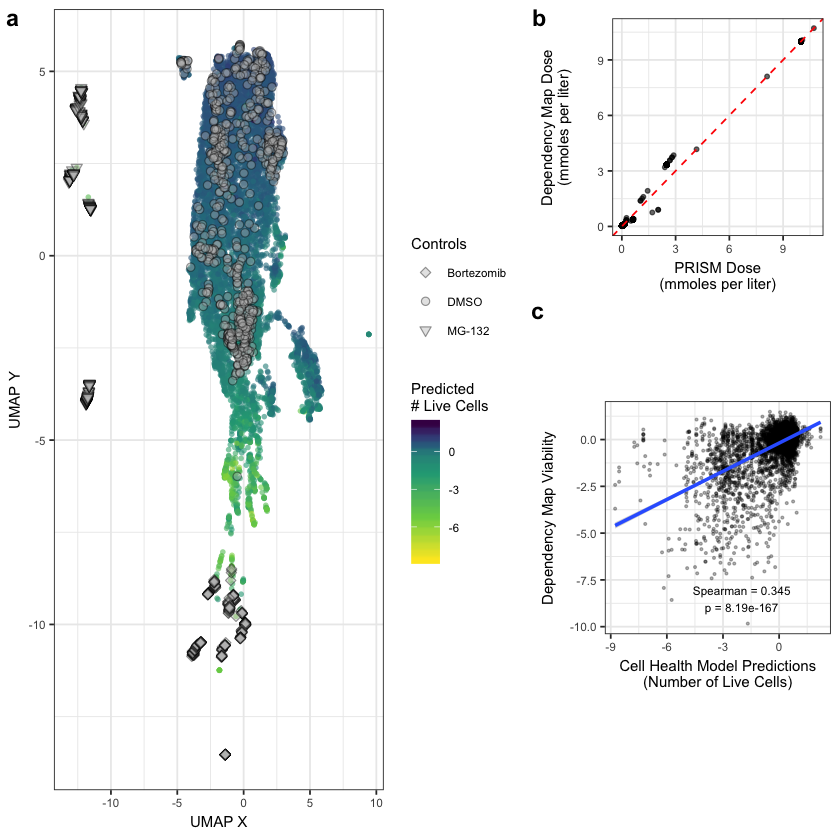

In [19]:
# Create multiplot
panel_b_c <- cowplot::plot_grid(
    sup_panel_b_gg + figure_theme,
    panel_c_gg + figure_theme,
    labels = c("b", "c"),
    align = "hv",
    vjust = c(1, 1),
    nrow = 2,
    rel_heights = c(0.6, 1)
)

sup_fig <- cowplot::plot_grid(
    sup_panel_a_gg + figure_theme,
    panel_b_c,
    labels = c("a", ""),
    align = "hv",
    rel_widths = c(1, 0.6)
)

figure_file <- file.path("figures", "lincs_supplementary_figure.png")

cowplot::save_plot(
    filename = figure_file,
    plot = sup_fig,
    dpi = 500,
    base_width = 8,
    base_height = 5
)

sup_fig